<strong style="color:#B3005E;font-size:60px;font-family:Georgia;text-align:center;">A/B Testing </strong>


<div style="float:center;margin-left:100px;max-width:100%;">
<img src="https://i.imgur.com/7BiesIO.gif"></div>



<strong style="color:#B3005E;font-size:20px;font-family:Georgia;text-align:center;">“A/B testing can provide value, but it shouldn’t come at the expense of other areas of design.”
 </strong>
 
 The process of decision making in design has always been a popular area of discussion. Why do some designers make choices that others don’t, and why do some designs seemingly work better than others?

From academic study to sketches and anecdotes, the design world is fascinated with process. But for all of the legendary stories of lore, few anecdotes in recent times have had the staying power of Google and its 41 shades of blue.

In trying to determine which out of 2 shades of blue to use for link text, Google tested not only the 2, but also the 39 shades of blue in between. The story outlines a relatively minute decision but highlights a rapidly growing approach to making decisions. One based in experimentation, alternatives, and, most importantly, data.


<strong style="color:#B3005E;font-size:20px;font-family:Georgia;"> AB Testing Process </strong>

* Understanding business problem & data
* Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
* Look summary stats and plots
* Apply hypothesis testing and check assumptions
* Check Normality & Homogeneity
* Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
* Evaluate the results
* Make inferences
* Recommend business decision to your customer/director/ceo etc.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#B3005E;font-family:Georgia;color:#FFEA20;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FFEA20;">...Table of Contents...</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Packages-Libraries-Settings <span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Load Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Data Understanding & Summary Stats<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">A/B Testing<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;"> ^^^^^<span class="badge badge-primary badge-pill">5</span></a>
</div>
</div>
</div>

<div style="float:center;margin-left:150px;max-width:100%;">
<img src="https://miro.medium.com/v2/resize:fit:1400/0*BKbkXes6rKTrVA1f."></div>



<a id = "1"></a>
<strong style="color:#B3005E;font-size:20px;font-family:Georgia;text-align:center;">  Packages-Libraries-Settings 📜 ⚙️ </strong>


In [1]:
#!pip install statsmodels
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal, normaltest
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<a id = "2"></a>
<strong style="color:#B3005E;font-size:20px;font-family:Georgia;text-align:center;">  Load Data </strong>

In [2]:
df = pd.read_csv('/kaggle/input/ab-test-data/AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00000
1,2423,control,0.00000
2,9411,control,0.00000
3,7311,control,0.00000
4,6174,variant,0.00000


<strong style="color:#B3005E;font-size:18px;font-family:Georgia;">  We wonder if there is a statistical difference in the revenues according to the variables. Let's observe together how we can find out about this. After making our observations, let's set up our hypothesis. </strong>


<a id = "3"></a>
<strong style="color:#B3005E;font-size:30px;font-family:Georgia;text-align:center;">  Data Understanding & Summary Stats </strong>

In [3]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 10000
Columns: 3
------------------------------- TYPES --------------------------------
USER_ID           int64
VARIANT_NAME     object
REVENUE         float64
dtype: object
-------------------------------- HEAD --------------------------------
   USER_ID VARIANT_NAME  REVENUE
0      737      variant  0.00000
1     2423      control  0.00000
2     9411      control  0.00000
3     7311      control  0.00000
4     6174      variant  0.00000
-------------------------------- TAIL --------------------------------
      USER_ID VARIANT_NAME  REVENUE
9995     1981      control  0.00000
9996      502      variant  0.00000
9997     9214      variant  0.00000
9998     7741      control  0.00000
9999     9468      control  0.00000
--------------------------- MISSING VALUES ---------------------------
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64
------------------------- DUPLICATED VALUES -----------

In [4]:
# Number of Unique User
print(df['USER_ID'].nunique() == df.shape[0])

False


In [5]:
#  remove USER_ID who have two groups

duplicates = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
duplicates = duplicates[duplicates]

# USER_ID_nunique data

df = df[df["USER_ID"].isin(duplicates.index)]

In [6]:
# and then take only these users
print(" DESCRIBE ".center(70,'-'))

df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["REVENUE"]].T

------------------------------ DESCRIBE ------------------------------


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
REVENUE,6070.00000,0.10706,2.67350,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.16000,196.01000


In [7]:
df.sort_values(by='REVENUE', ascending=False).head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01000
8168,2166,control,29.32000
2482,7356,variant,23.04000
6412,1053,control,20.07000
5217,3684,variant,19.47000
5530,282,control,18.56000
758,4445,control,17.05000
4031,2059,control,14.24000
9019,1973,control,14.07000
4561,4966,variant,12.99000


In [8]:
# A/B Groups & Target Summary Stats
df.groupby(by='VARIANT_NAME').agg({'USER_ID': 'nunique',
                                               'REVENUE': ['sum', 'mean', 'median', 'count']})

USER_ID   REVENUE                      
             nunique       sum    mean  median count
VARIANT_NAME                                        
control         2390 470.56000 0.15551 0.00000  3026
variant         2393 179.32000 0.05891 0.00000  3044

In [9]:
# A/B Groups & Target Summary Stats
df.groupby("USER_ID")['REVENUE'].agg(["count", "median", "mean", "std", "max", 'sum']).sort_values(by='sum', ascending=False)

,count,median,mean,std,max,sum
USER_ID,,,,,,
3342,1,196.01000,196.01000,NaN,196.01000,196.01000
2166,2,14.66000,14.66000,20.73237,29.32000,29.32000
7356,1,23.04000,23.04000,NaN,23.04000,23.04000
1053,4,0.00000,5.01750,10.03500,20.07000,20.07000
3684,1,19.47000,19.47000,NaN,19.47000,19.47000
...,...,...,...,...,...,...
3363,1,0.00000,0.00000,NaN,0.00000,0.00000
3362,1,0.00000,0.00000,NaN,0.00000,0.00000
3361,1,0.00000,0.00000,NaN,0.00000,0.00000


In [10]:
# What is the confidence interval for the 'REVENUE' value?

sms.DescrStatsW(df["REVENUE"]).tconfint_mean()

(0.039794372950474055, 0.17433412787324915)

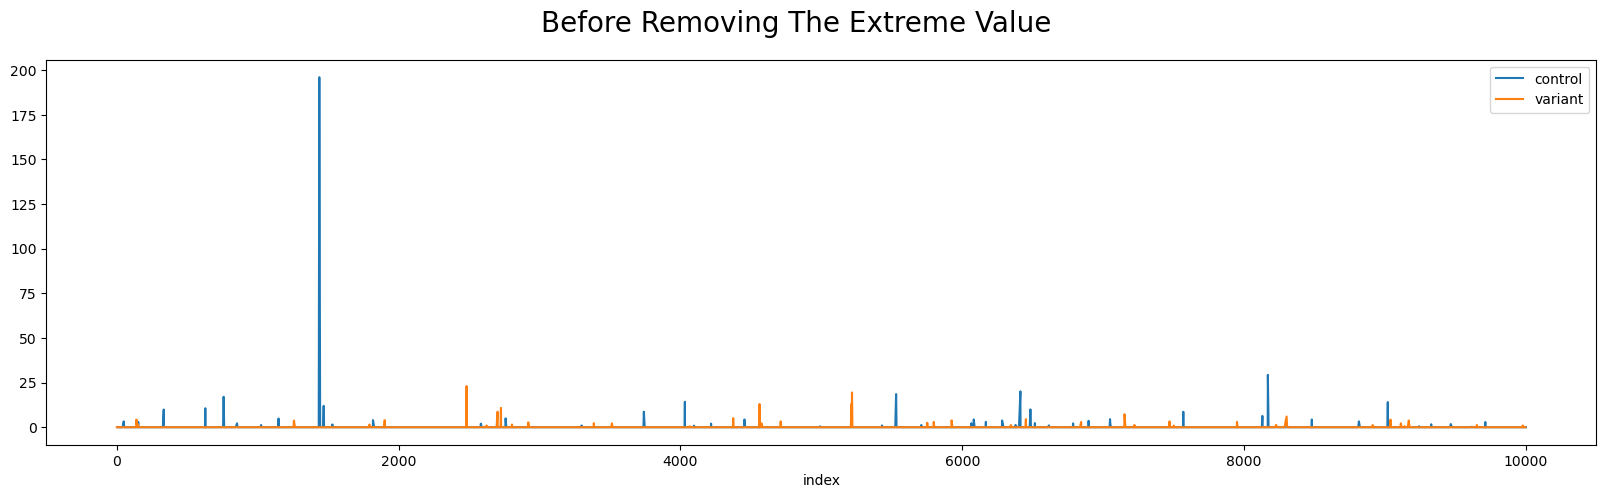

In [11]:
df[df['VARIANT_NAME'] == "control"].reset_index().set_index("index")['REVENUE'].plot(legend = True, label = "control", figsize = (20,5))
df[df['VARIANT_NAME'] == "variant"].reset_index().set_index("index")['REVENUE'].plot(legend = True, label = "variant")
plt.suptitle("Before Removing The Extreme Value", fontsize = 20);

In [12]:
# Gormek istemedigimiz aykiri degerleri daha sonraki islemler icin temizleyelim

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit.round(), up_limit.round()


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "REVENUE")

In [13]:
# What is the confidence interval for the 'REVENUE' value?

sms.DescrStatsW(df["REVENUE"]).tconfint_mean()

(0.03595388879674289, 0.05730476029716155)

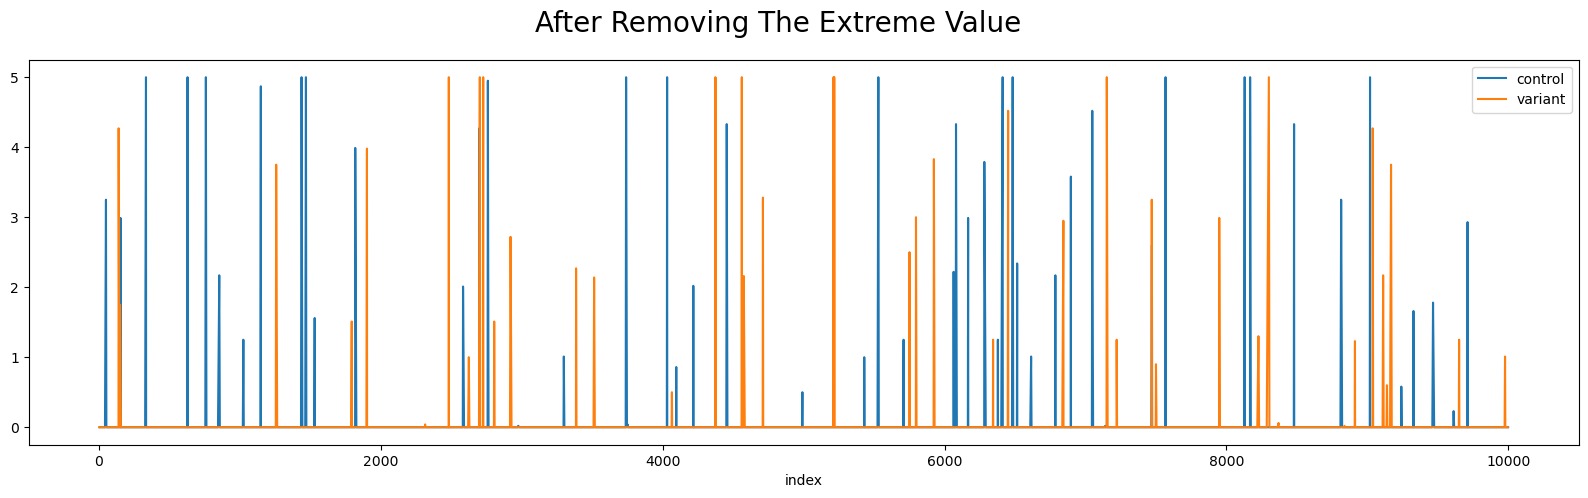

In [14]:
df[df['VARIANT_NAME'] == "control"].reset_index().set_index("index")['REVENUE'].plot(legend = True, label = "control", figsize = (20,5))
df[df['VARIANT_NAME'] == "variant"].reset_index().set_index("index")['REVENUE'].plot(legend = True, label = "variant")
plt.suptitle("After Removing The Extreme Value", fontsize = 20);

In [15]:
# Is there a significant difference between the average REVENUE of the control and variant groups ?

# H0: Data is a normal distribution
# H1: Data is a non-normal distribution

df.groupby('VARIANT_NAME').agg({'REVENUE': ['sum', 'count']}).reset_index()

VARIANT_NAME   REVENUE      
                     sum count
0      control 165.06000  3026
1      variant 117.98000  3044

<a id = "3"></a>
<strong style="color:#B3005E;font-size:30px;font-family:Georgia;text-align:center;">  A/B Testing </strong>

<strong style="color:#B3005E;font-size:20px;font-family:Georgia;">  * Assumptions: </strong>


* Check normality
* If Normal Distribution, check homogeneity
* Steps:
* Split & Define Control Group & Test Group
* Apply Shapiro Test for normality
* If parametric apply Levene Test for homogeneity of variances
* If Parametric + homogeneity of variances apply T-Test
* If Parametric - homogeneity of variances apply Welch Test
* If Non-parametric apply Mann Whitney U Test directly

In [16]:
# A/B Testing Function - Quick Solution
def AB_Test(dataframe, group, target, A, B):
    
    # Packages
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == A][target]
    groupB = dataframe[dataframe[group] == B][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
AB_Test(dataframe=df, group="VARIANT_NAME", target="REVENUE", A='control', B='variant')

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Fail to Reject H0,0.24485,A/B groups are similar!


<div <h1 <strong style="color:#B3005E;font-size:18px;font-family:Georgia;">  ^^Here we observe that there is no statistical difference on the revenues of the control and variant variables. </strong></div>

<div <h1 <strong style="color:#B3005E;font-size:18px;font-family:Arial;">  Since p value is greater than 0.05, ------->--------------->-------------->-------------->------------------->---------->----------> H0 HYPOTESIS IS NOT REJECTED! </strong></div>



<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">If you like this then please UPVOTE this 😄 Your opinions and suggestions are very important to me...<img src="https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif" width="100"> <div style="float:center;margin-left:270px;max-width:50%;">

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">
FOR MORE:</p> 

https://www.linkedin.com/in/serdar-ozturk/

https://github.com/StanleyHopson

https://medium.com/@serdar.f95

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">CREDITS:</p> 

[https://numpy.org/](http://)

[https://seaborn.pydata.org/](http://)

[https://pandas.pydata.org](http://)

[https://pandas.pydata.org/](http://)

[https://learning.miuul.com](http://)